In [ ]:
!gdown --id 1uUtK2qrXIjQg2Da1jy91KUsp8Cw-kE_5

Downloading...
From: https://drive.google.com/uc?id=1uUtK2qrXIjQg2Da1jy91KUsp8Cw-kE_5
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 19.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
sn.set()

In [ ]:
data = pd.read_csv('insurance.csv')
data.head(7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


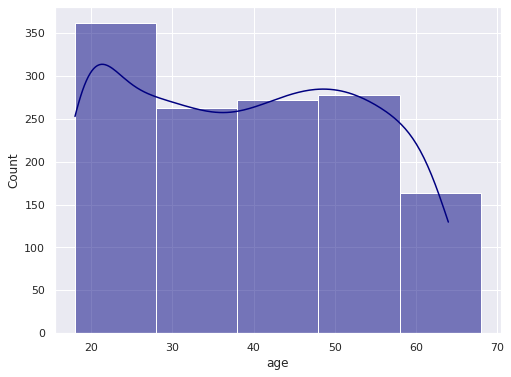

In [ ]:
plt.figure(figsize=(8,6))
sn.histplot(data["age"],color='#000080',binwidth=10,kde=True)

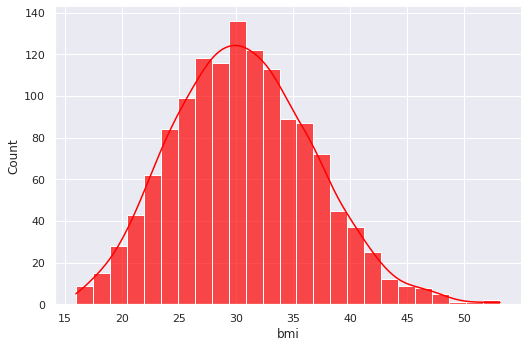

In [ ]:
sn.displot(data["bmi"], color='red', kde=True, aspect=1.5, alpha = 0.7)

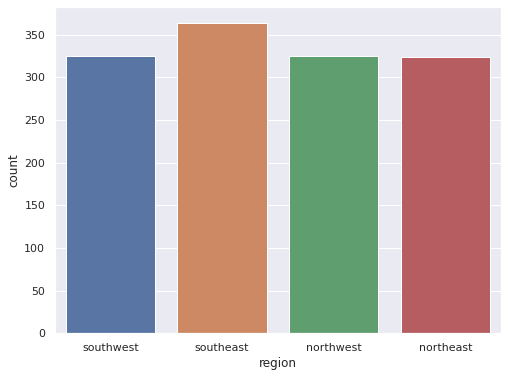

In [ ]:
plt.figure(figsize=(8,6))
sn.countplot(data =data,x= data["region"])

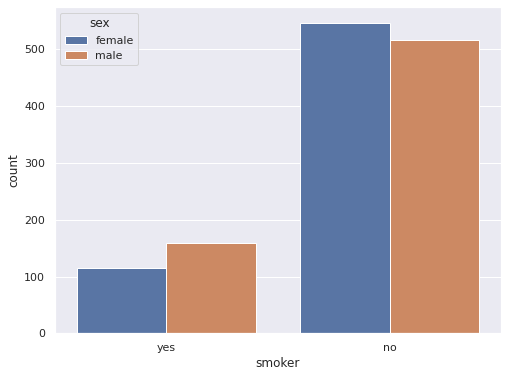

In [ ]:
plt.figure(figsize=(8,6))
sn.countplot(data =data,x= data["smoker"],hue="sex")

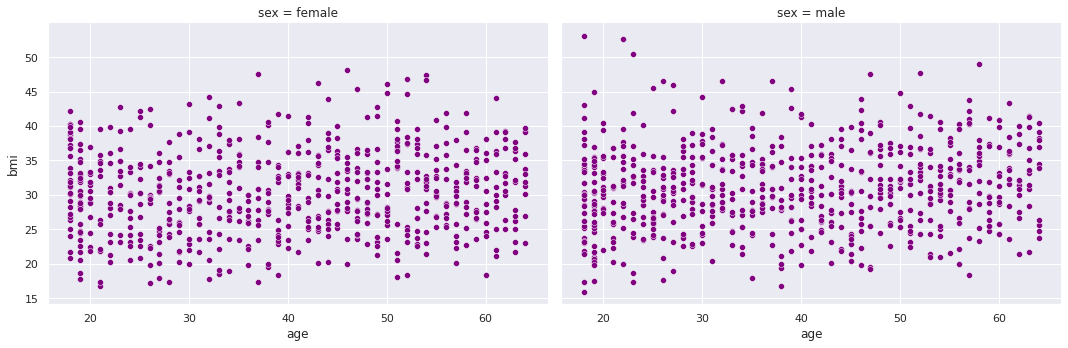

In [ ]:
sn.relplot(data=data, x="age", y="bmi", col="sex",color='purple',aspect=1.5)

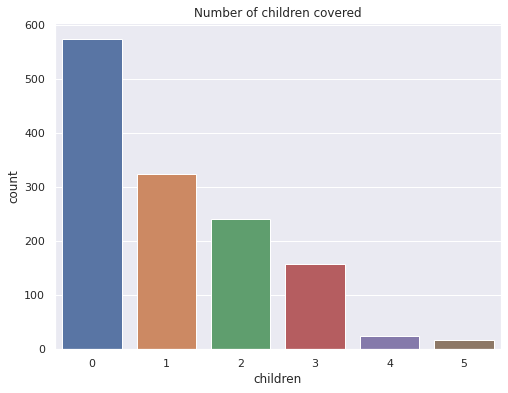

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Number of children covered')
sn.countplot(data =data,x= data["children"])

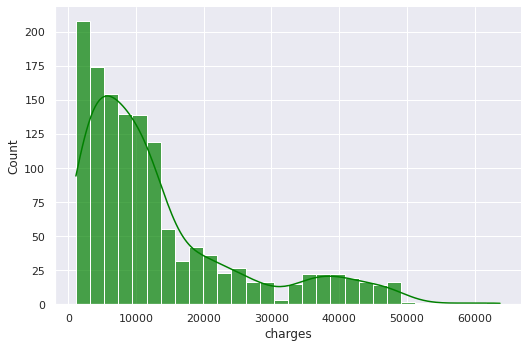

In [ ]:
sn.displot(data["charges"], color='green', kde=True, aspect=1.5, alpha = 0.7)

In [ ]:
print(data['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
data["smoker"] = data["smoker"].map({'no':0,"yes":1})
data["sex"] = data["sex"].map({'female':0,"male":1})
data["region"] = data["region"].map({'southwest':0,"southeast":1,"northwest":2,"northeast":3})
data.rename(columns={'sex':'is_male','smoker':'is_smoker'}, inplace=True)
data.head(5).style.set_properties(**{'text-align': 'center'})


,age,is_male,bmi,children,is_smoker,region,charges
0,19,0,27.900000,0,1,0,16884.924000
1,18,1,33.770000,1,0,1,1725.552300
2,28,1,33.000000,3,0,1,4449.462000
3,33,1,22.705000,0,0,2,21984.470610
4,32,1,28.880000,0,0,2,3866.855200


In [ ]:
data.describe()

,age,is_male,bmi,children,is_smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


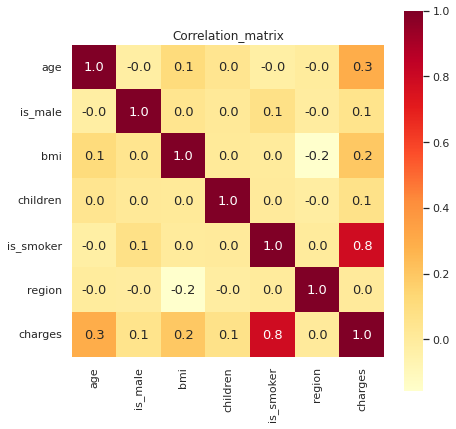

In [ ]:
feature_correlation = data.corr()
plt.figure(figsize=(7,7))
plt.title('Correlation_matrix')
sn.heatmap(feature_correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':13}, cmap='YlOrRd')

In [ ]:
data[data.columns].corr()['charges'][:-1].abs().sort_values(ascending=False).drop_duplicates()

is_smoker    0.787251
age          0.299008
bmi          0.198341
children     0.067998
is_male      0.057292
region       0.006208
Name: charges, dtype: float64

In [ ]:
x = data[['is_smoker','age','bmi']]
y = data['charges']

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,shuffle=True)
print(x_train.shape)
print(x_test.shape)

(1070, 3)
(268, 3)


In [ ]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)
print("The model's accuracy on train dataset :", reg_model.score(x_train,y_train).round(3)*100,'%')
print("The model's accuracy on test dataset :", reg_model.score(x_test,y_test).round(3)*100,'%')


The model's accuracy on train dataset : 74.7 %
The model's accuracy on test dataset : 74.8 %


In [ ]:
bias = reg_model.intercept_.round(3)
coefficient = reg_model.coef_.round(3)
f_reg = f_regression(x_train,y_train)
p_values = f_reg[1]
summary = pd.DataFrame(data = ['is_smoker','age','bmi'],columns=['feature'])
summary["coefficients"] = coefficient
summary["p-values"] = p_values
summary.style.set_properties(**{'text-align': 'center'})

,feature,coefficients,p-values
0,is_smoker,23714.398000,0.000000
1,age,254.385000,0.000000
2,bmi,354.616000,0.000000


In [ ]:
print('bias :',bias)
print('coefficients : ',coefficient)

bias : -12426.641
coefficients :  [23714.398   254.385   354.616]



$\hat{Y} = -12426.641 +  23714.398\;({X}_{1}) + 254.385\;({X}_{2}) +  354.616\;({X}_{3})$





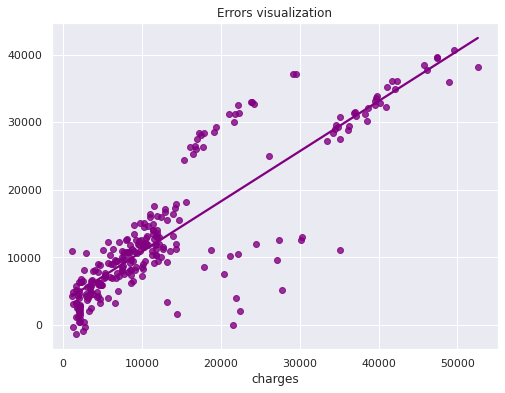

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Errors visualization')
sn.regplot(x=y_test, y=reg_model.predict(x_test), ci=None, color="purple")

Text(0.5, 1.0, 'Histogram of Errors')

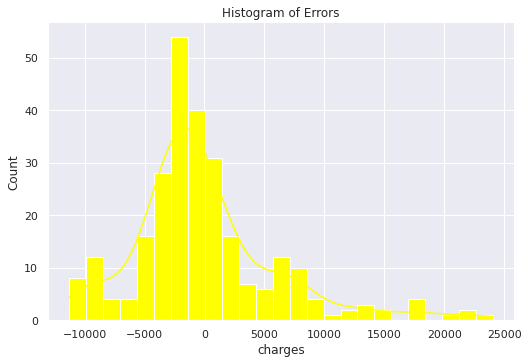

In [ ]:
loss = y_test - reg_model.predict(x_test)
sn.displot(loss, kde=True, aspect=1.5 ,color="yellow",alpha = 1)
plt.title("Histogram of Errors")

In [ ]:
new_x = data['is_smoker']
y = data['charges']
new_x = new_x.values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x,y,test_size=0.20,shuffle=True)
print(x_train.shape)
print(x_test.shape)

(1070, 1)
(268, 1)


In [ ]:
new_reg_model = LinearRegression()
new_reg_model.fit(x_train,y_train)
print("The model's accuracy on train dataset :", new_reg_model.score(x_train,y_train).round(3)*100,'%')
print("The model's accuracy on test dataset :", new_reg_model.score(x_test,y_test).round(4)*100,'%')

The model's accuracy on train dataset : 62.9 %
The model's accuracy on test dataset : 57.3 %
